# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


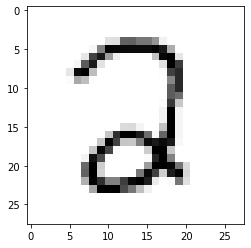

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2444
Training Accuracy: 0.6303, Testing Accuracy: 0.6164



Epoch 10, Loss 0.107
Training Accuracy: 0.9138, Testing Accuracy: 0.9309



Epoch 20, Loss 0.0608
Training Accuracy: 0.9387, Testing Accuracy: 0.9531



Epoch 30, Loss 0.0465
Training Accuracy: 0.9509, Testing Accuracy: 0.9597



Epoch 40, Loss 0.0396
Training Accuracy: 0.9567, Testing Accuracy: 0.9627



Epoch 50, Loss 0.0355
Training Accuracy: 0.9606, Testing Accuracy: 0.9637



Epoch 60, Loss 0.0326
Training Accuracy: 0.9632, Testing Accuracy: 0.9662



Epoch 70, Loss 0.0305
Training Accuracy: 0.9650, Testing Accuracy: 0.9677



Epoch 80, Loss 0.0289
Training Accuracy: 0.9659, Testing Accuracy: 0.9688



Epoch 90, Loss 0.0275
Training Accuracy: 0.9667, Testing Accuracy: 0.9688



Epoch 100, Loss 0.0264
Training Accuracy: 0.9680, Testing Accuracy: 0.9682



Epoch 110, Loss 0.0254
Training Accuracy: 0.9695, Testing Accuracy: 0.9693



Epoch 120, Loss 0.0246
Training Accuracy: 0.9709, Testing Accuracy: 0.9693



Epoch 130, Loss 0.0238
Training Accuracy: 0.9721, Testing Accuracy: 0.9703



Epoch 140, Loss 0.0231
Training Accuracy: 0.9730, Testing Accuracy: 0.9703



Epoch 150, Loss 0.0224
Training Accuracy: 0.9742, Testing Accuracy: 0.9713



Epoch 160, Loss 0.0218
Training Accuracy: 0.9747, Testing Accuracy: 0.9718



Epoch 170, Loss 0.0213
Training Accuracy: 0.9754, Testing Accuracy: 0.9723



Epoch 180, Loss 0.0208
Training Accuracy: 0.9761, Testing Accuracy: 0.9723



Epoch 190, Loss 0.0203
Training Accuracy: 0.9770, Testing Accuracy: 0.9723



Epoch 200, Loss 0.0198
Training Accuracy: 0.9776, Testing Accuracy: 0.9733



Epoch 210, Loss 0.0194
Training Accuracy: 0.9784, Testing Accuracy: 0.9733



Epoch 220, Loss 0.0189
Training Accuracy: 0.9788, Testing Accuracy: 0.9733



Epoch 230, Loss 0.0185
Training Accuracy: 0.9797, Testing Accuracy: 0.9738



Epoch 240, Loss 0.0181
Training Accuracy: 0.9801, Testing Accuracy: 0.9743



0.0016024198854258044

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2287
Training Accuracy: 0.7113, Testing Accuracy: 0.7016



Epoch 10, Loss 0.1042
Training Accuracy: 0.9045, Testing Accuracy: 0.9173



Epoch 20, Loss 0.0796
Training Accuracy: 0.9265, Testing Accuracy: 0.9400



Epoch 30, Loss 0.0682
Training Accuracy: 0.9363, Testing Accuracy: 0.9486



Epoch 40, Loss 0.0614
Training Accuracy: 0.9423, Testing Accuracy: 0.9516



Epoch 50, Loss 0.0568
Training Accuracy: 0.9458, Testing Accuracy: 0.9567



Epoch 60, Loss 0.0535
Training Accuracy: 0.9484, Testing Accuracy: 0.9592



Epoch 70, Loss 0.051
Training Accuracy: 0.9502, Testing Accuracy: 0.9607



Epoch 80, Loss 0.049
Training Accuracy: 0.9515, Testing Accuracy: 0.9617



Epoch 90, Loss 0.0473
Training Accuracy: 0.9531, Testing Accuracy: 0.9627



Epoch 100, Loss 0.0459
Training Accuracy: 0.9538, Testing Accuracy: 0.9632



Epoch 110, Loss 0.0447
Training Accuracy: 0.9547, Testing Accuracy: 0.9632



Epoch 120, Loss 0.0437
Training Accuracy: 0.9553, Testing Accuracy: 0.9637



Epoch 130, Loss 0.0428
Training Accuracy: 0.9559, Testing Accuracy: 0.9642



Epoch 140, Loss 0.042
Training Accuracy: 0.9562, Testing Accuracy: 0.9652



Epoch 150, Loss 0.0413
Training Accuracy: 0.9569, Testing Accuracy: 0.9657



Epoch 160, Loss 0.0406
Training Accuracy: 0.9574, Testing Accuracy: 0.9657



Epoch 170, Loss 0.04
Training Accuracy: 0.9578, Testing Accuracy: 0.9657



Epoch 180, Loss 0.0395
Training Accuracy: 0.9585, Testing Accuracy: 0.9662



Epoch 190, Loss 0.039
Training Accuracy: 0.9586, Testing Accuracy: 0.9662



Epoch 200, Loss 0.0385
Training Accuracy: 0.9592, Testing Accuracy: 0.9657



Epoch 210, Loss 0.0381
Training Accuracy: 0.9596, Testing Accuracy: 0.9657



Epoch 220, Loss 0.0377
Training Accuracy: 0.9598, Testing Accuracy: 0.9657



Epoch 230, Loss 0.0373
Training Accuracy: 0.9601, Testing Accuracy: 0.9662



Epoch 240, Loss 0.0369
Training Accuracy: 0.9607, Testing Accuracy: 0.9657



0.06178124792092672

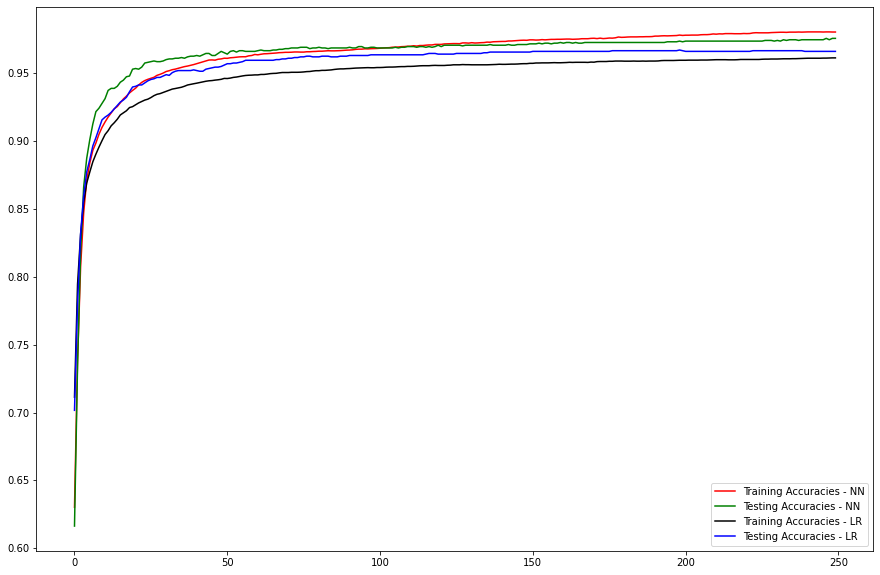

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

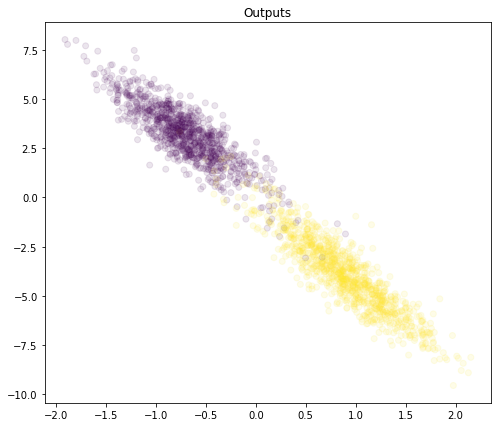

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

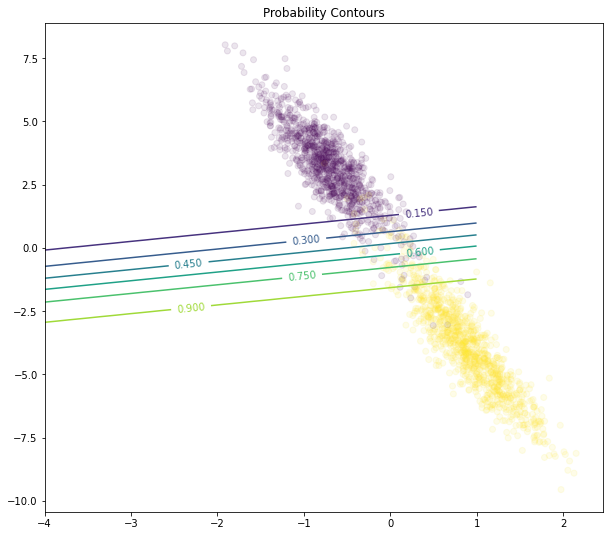

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );